In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from glob import glob

In [49]:
img = image.load_img('dog.jpg', target_size=(224, 224))

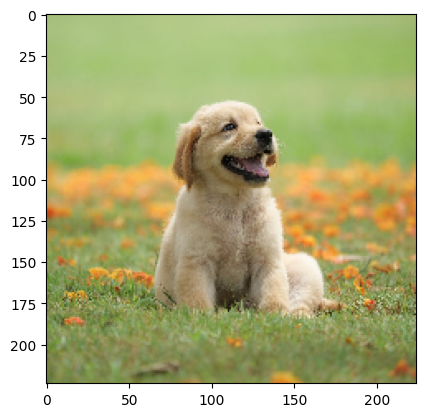

In [50]:
plt.imshow(img)

In [51]:
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)

In [52]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [53]:
activation_layer = resnet.get_layer('conv5_block3_out')

In [54]:
final_dense = resnet.get_layer('predictions')

In [55]:
model = Model(inputs=resnet.input, outputs=activation_layer.output)

In [56]:
W = final_dense.get_weights()

In [57]:
W

[array([[-0.01490746,  0.0113374 , -0.05073728, ..., -0.02179668,
         -0.07764222,  0.01018347],
        [-0.00294467,  0.00319835,  0.01953556, ...,  0.03623696,
          0.00350259, -0.03321117],
        [-0.01751374,  0.00807406,  0.00851311, ..., -0.03024036,
          0.05494978, -0.02511911],
        ...,
        [ 0.025289  ,  0.0630148 ,  0.02041481, ..., -0.00508354,
         -0.03542514, -0.01306196],
        [-0.00623157, -0.01624131, -0.01221174, ...,  0.01376359,
          0.04087579, -0.0185826 ],
        [-0.02668471,  0.0130982 , -0.01847764, ...,  0.06304929,
          0.02561448, -0.00693536]], dtype=float32),
 array([-8.06632824e-03, -2.82376772e-03, -6.42026169e-03, -1.45175382e-02,
         1.85494672e-03, -1.18305106e-02,  4.32976376e-04,  6.83434773e-04,
        -4.48546931e-03, -5.43952826e-03, -7.74441753e-03, -4.83709993e-03,
        -1.29229026e-02, -3.47052747e-03, -2.76576495e-03, -6.09770464e-03,
        -1.26926170e-03, -6.55239029e-03,  7.65493792e

In [58]:
x = preprocess_input(np.expand_dims(img, axis=0))
fmaps = model.predict(x)[0]  # (7, 7, 2048)

probs = resnet.predict(x)
classnames = decode_predictions(probs, top=5)[0]

In [59]:
classnames

[('n02099712', 'Labrador_retriever', 0.76720315),
 ('n02099601', 'golden_retriever', 0.21570875),
 ('n02104029', 'kuvasz', 0.005695337),
 ('n02113799', 'standard_poodle', 0.0054757576),
 ('n02113712', 'miniature_poodle', 0.001168473)]

In [60]:
classname = classnames[0][1]
classname

'Labrador_retriever'

In [61]:
pred = np.argmax(probs[0])
pred

208

In [62]:
w = W[0][:, pred]

In [63]:
cam = fmaps.dot(w)

In [64]:
cam = sp.ndimage.zoom(cam, (32, 32), order=1)

Text(0.5, 1.0, 'Labrador_retriever')

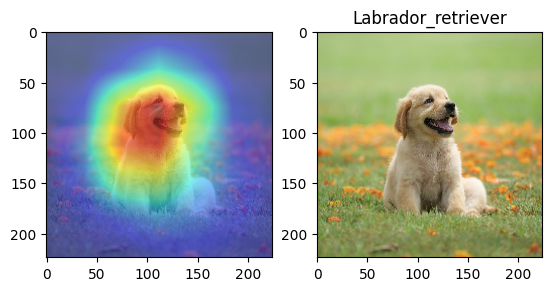

In [65]:
plt.subplot(1, 2, 1)
plt.imshow(img, alpha=0.8)
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title(classname)